# Austin AirBnB Data Analysis

## Team Members:
Quynh Tran, Ryan Burdick, Jesse Dymond & Upendra Addepalle

## Project Description:
We will be analyzing AirBnB data to find trends in Austin

## Research Questions to Answer:
* Are ratings influenced by proximity or neighborhood.
* Are there certain neighborhoods that have higher concentration of rentals.
* Does higher ratings indicative of price of a rental.
* What percent of room types are offered in a neighborhood.
* What percent of room types are more popular in a neighborhood
* Determine demand in any given month.
* Is Airbnb popularity increasing in the Austin area.
* What rental types are most popular/available

## Datasets to be Used:
Austin, Texas, United States The primary data used for our analysis of Airbnb consisted of zip codes, pricing, reviews, and type of room. The data was gathered from csv files specific to Austin Airbnb on their website.


## Breakdown of Tasks
* Get the Calendar Data
* Analyze Calendar by year month and average price
* Analyze the same during a weekday
* Get the reviews data and analyze it by count of reviews and year
* Analyze reviews by each room type offered.
* Get the listings data and analyze it by zip code grouped by room type offered
* Analyze listings by price, room type and zipcode
* Check the reviews by month
* Plot the neighborhoods in gmaps using geo coordinates and number of reviews
* Highlight the most popular neighborhood.
* Analyze the reviews based on the avegage price of a listing.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import calendar
import os
import json
import gmaps
import csv
from scipy.stats import linregress
#google developer API key
from Config import gkey
from stats import mode
#
%matplotlib inline

## Seasonal Pattern of Prices

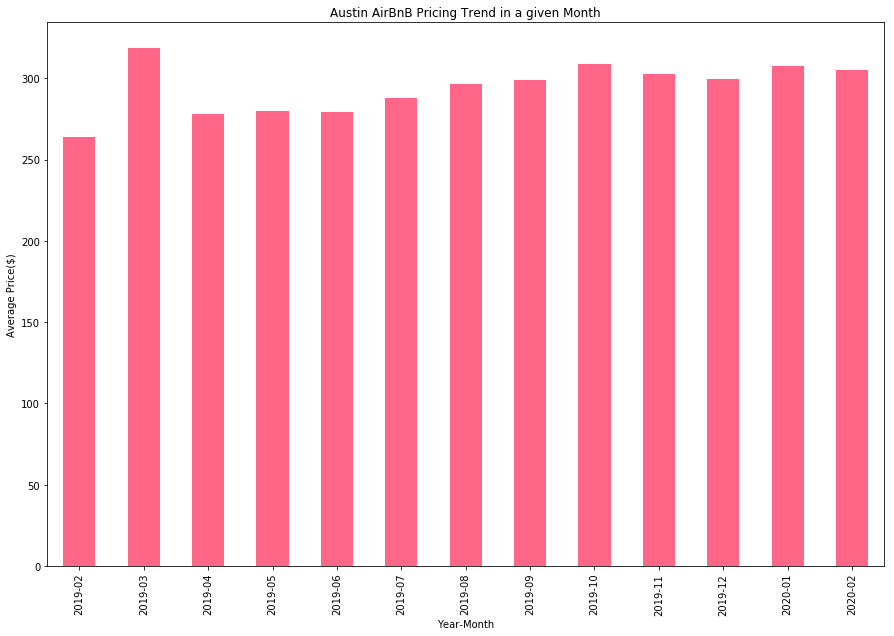

In [2]:
calendar_df1 = pd.read_csv('master_data/calendar.csv.gz')
#Extracting prices from the table so it doesn't have no numeric errors
price = calendar_df1['price']
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','', p)
    prices.append(float(p))
    
#replace the price column with the new column
calendar_df1['price']=prices

calendar_df1 = calendar_df1[calendar_df1.price >= 0]

#separating date column into day month and year
calendar_df1['Year'],calendar_df1['Month'],calendar_df1['Day']=calendar_df1['date'].str.split('-',2).str

Avg_price=calendar_df1.groupby(['Year','Month']).price.mean()
Avg_price=Avg_price.reset_index()
Avg_price=Avg_price.rename(columns={'price':'Average_Price'})
Avg_price['Year-Month']=Avg_price['Year'].map(str) + "-" + Avg_price['Month'].map(str)

# Visualize the trend of the year-month average prices of the listings
objects = Avg_price['Year-Month']
y_pos = Avg_price['Average_Price']
Avg_price.plot(kind='bar', 
           x='Year-Month',
           y='Average_Price',
           color = '#ff6687', 
           figsize =(15,10), 
           title = 'Austin AirBnB Pricing Trend in a given Month', 
           legend = False)
plt.ylabel('Average Price($)')
plt.savefig("images/Airbnb_pricing_trend_in_a_given_month.png")

# 
We can see that the average prices are consistent over the months except for March where average prices for airbnb prices is the highest. It could be due to the fact that South By South West (SXSW) happens in March.

# Average Price for Each Days of the Week

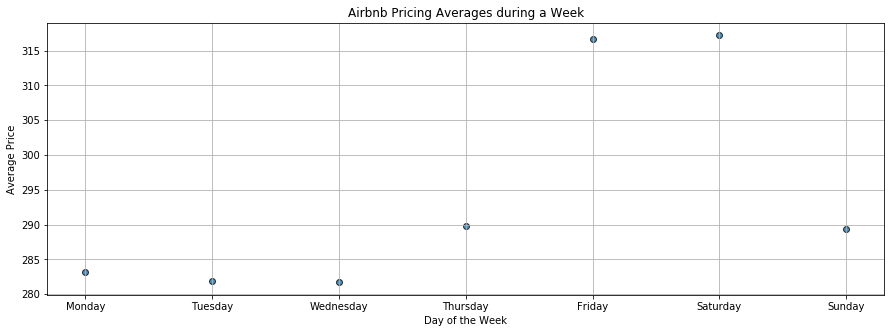

In [3]:
#Changing date to days of the week
calendar_df2 = pd.read_csv("master_data/calendar.csv.gz")
#Extracting prices again from the table so it doesn't have no numeric errors
price = calendar_df2['price']
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','', p)
    prices.append(float(p))
    
#replace the price column with the new column
calendar_df2['price']=prices

calendar_df2 = calendar_df2[calendar_df2.price >= 0]

calendar_df2['date'] = pd.to_datetime(calendar_df2['date'])
calendar_df2['Days of Week'] = calendar_df2['date'].dt.day_name()
Avg_day=calendar_df2.groupby('Days of Week').price.mean()
Avg_day=Avg_day.reset_index()
Avg_day['day_num']=0


for index,row in Avg_day.iterrows():
    if row['Days of Week']=='Monday':
        Avg_day.loc[index, 'day_num'] = 1
    if row['Days of Week']=='Tuesday':
        Avg_day.loc[index, 'day_num'] = 2
    if row['Days of Week']=='Wednesday':
        Avg_day.loc[index, 'day_num'] = 3
    if row['Days of Week']=='Thursday':
        Avg_day.loc[index, 'day_num'] = 4
    if row['Days of Week']=='Friday':
        Avg_day.loc[index, 'day_num'] = 5
    if row['Days of Week']=='Saturday':
        Avg_day.loc[index, 'day_num'] = 6
    if row['Days of Week']=='Sunday':
        Avg_day.loc[index, 'day_num'] = 7
Avg_day=Avg_day.sort_values('day_num',ascending=[1])
Avg_day=Avg_day.rename(columns={'price':'Average_Price'})
plt.figure(figsize=(15,5))
plt.scatter(Avg_day["Days of Week"], Avg_day["Average_Price"], edgecolor="black", linewidths=1, marker="o",alpha=0.8,s=35)
plt.grid(True)
plt.title ("Airbnb Pricing Averages during a Week")
plt.ylabel("Average Price")
plt.xlabel("Day of the Week")
plt.savefig("images/Airbnb_weekday_pricing.png")
plt.show()

* As you would expect, Friday and Saturday are the most expensive days of the week!
* With prices slightly higher on Thursday than Sunday that could mean that more people are willing to take off Friday from work than a Monday to extend their weekend.

## Question 
- Are review numbers increasing year over year? 

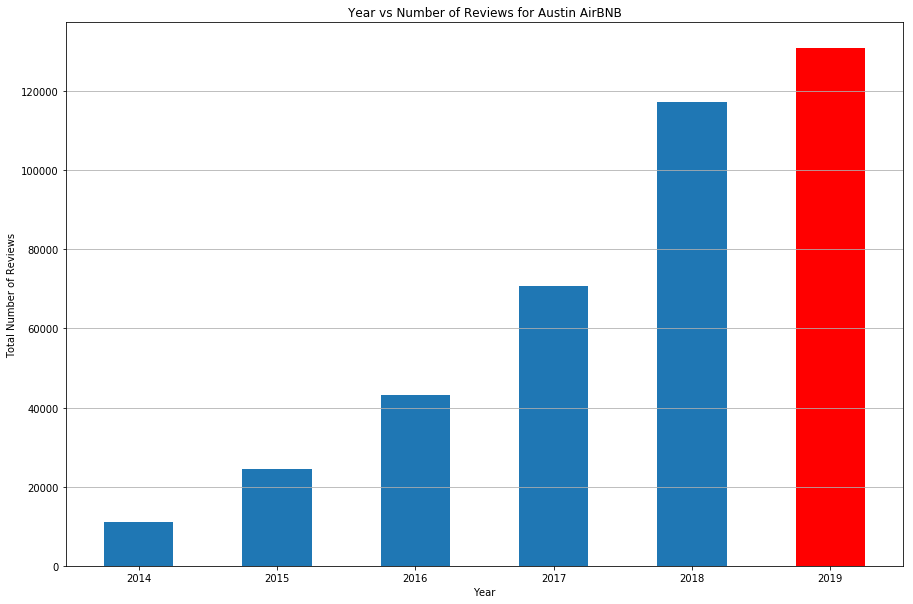

In [4]:
r_review_df = pd.read_csv('master_data/reviews.csv')
r_new_df = r_review_df['date'].str.split("-",expand=True,)
r_review_df["Year"]= r_new_df[0] 
r_review_df.drop(columns =["date"], inplace = True)  
r_grouped_year = r_review_df.groupby(['Year'])
r_review_count = r_grouped_year[["id"]].count()
r_count_df = pd.DataFrame(data=(r_review_count))
r_count_df.rename(columns={"id": "Review Count"}, inplace=True)
r_plot_df = r_count_df.drop(labels = ['2008','2009', '2010', '2011', '2012', '2013', '2019'])
r_x = r_plot_df.index
r_y = r_plot_df["Review Count"]
plt.figure(figsize=(15,10))
plt.bar(r_x, r_y,  width=0.5)
plt.title("Year vs Number of Reviews for Austin AirBNB")
plt.grid(axis='y')
plt.xlabel("Year")
plt.ylabel("Total Number of Reviews")
linregress([1,2,3,4,5], r_plot_df["Review Count"])
plt.bar(["2019"], 6*25842.1 - 24154.5, color='r', width=0.5)
plt.savefig("images/Year_vs_Number_of_Reviews_for_Austin_AirBNB.png")
plt.show()

Our dataset did not specifically list the number of bookings so we used the number of reviews for each year to show the popularity of Airbnb in Austin increasing quite dramatically year over year from just under 20,000 in 2014 to a projected 120,000+ in 2019

## Question 
- What does the data tell us about the room types and number of reviews

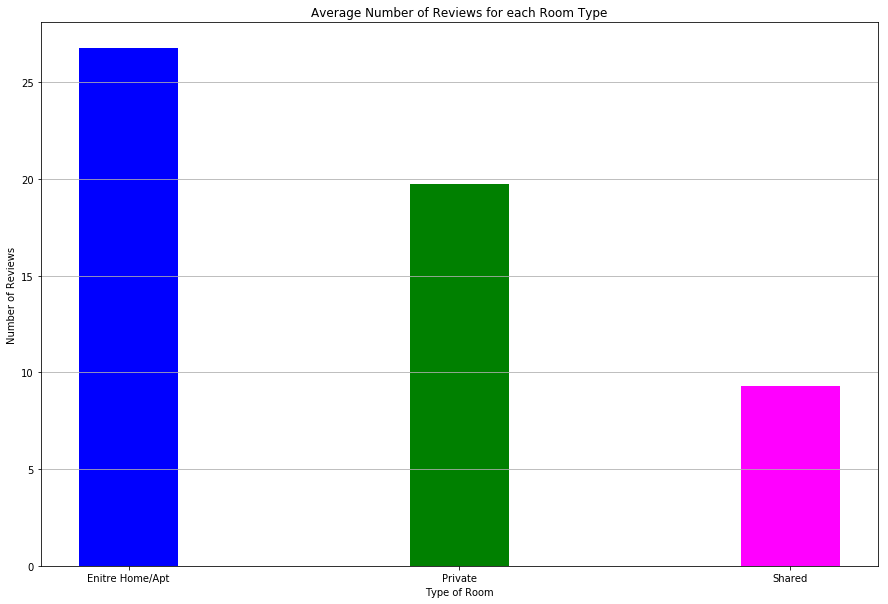

In [5]:
r_listing_df = pd.read_csv('master_data/listings.csv')
home_count = r_listing_df.loc[r_listing_df.room_type == 'Entire home/apt','room_type'].count()
private_count = r_listing_df.loc[r_listing_df.room_type == 'Private room','room_type'].count()
shared_count = r_listing_df.loc[r_listing_df.room_type == 'Shared room','room_type'].count()
total_count = home_count + private_count + shared_count
home_perc = home_count/total_count *100
private_perc = private_count/total_count *100
shared_perc = shared_count/total_count *100
home_df = r_listing_df.loc[r_listing_df["room_type"] == "Entire home/apt", :]
private_df = r_listing_df.loc[r_listing_df["room_type"] == "Private room", :]
shared_df = r_listing_df.loc[r_listing_df["room_type"] == "Shared room", :]
home_review = home_df['number_of_reviews'].sum()
private_review = private_df['number_of_reviews'].sum()
shared_review = shared_df['number_of_reviews'].sum()
total_review = home_review + private_review + shared_review
hr_perc = home_review/total_review *100
pr_perc = private_review/total_review *100
sr_perc = shared_review/total_review *100
home_avg = home_review/home_count
private_avg = private_review/private_count
shared_avg = shared_review/shared_count
rooms = ('Enitre Home/Apt', 'Private', 'Shared')
plt.figure(figsize=(15,10))
plt.bar(rooms, [home_avg, private_avg, shared_avg], color=["b", "g", "magenta"], width=0.3)
plt.grid(axis='y')
plt.title("Average Number of Reviews for each Room Type")
plt.xlabel("Type of Room")
plt.ylabel("Number of Reviews")
plt.savefig("images/Average_Number_of_Reviews_for_each_Room_Type.png")
plt.show()

Renting the Entire Home/Apt was by far the most available and reviewed room type in Austin

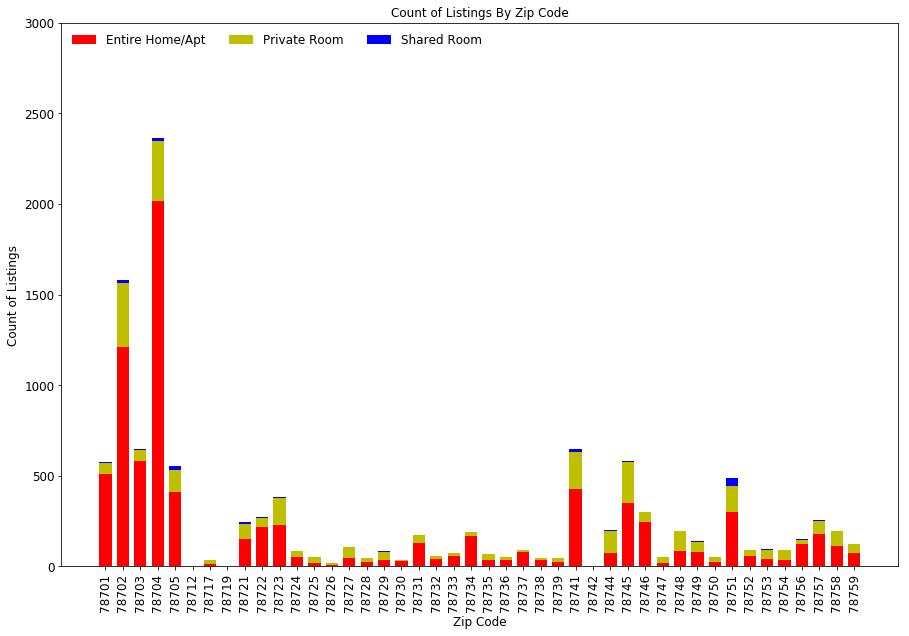

In [6]:
##5. What are the differences in prices for airbnb listing types (average price for the listing types, list the number of listings for each room type)
#Plot 1
u_listings_df = pd.read_csv("master_data/listings.csv")
u_listings_df = u_listings_df.drop(['neighbourhood_group'], axis=1)
# zrt = ZipCode Room Type
u_zrt_groupby_df = u_listings_df.groupby(['neighbourhood','room_type'])
u_zrt_count_df = u_zrt_groupby_df.count()
u_zrt_count_df = u_zrt_count_df.reset_index()
u_zrt_avg_df = u_zrt_groupby_df.agg(np.mean)
u_zrt_avg_df = u_zrt_avg_df.reset_index()
u_agg_count_df = u_zrt_count_df[['neighbourhood', 'room_type', 'calculated_host_listings_count']]
u_agg_count_pivot_df = u_agg_count_df.pivot(index='neighbourhood', columns='room_type', values='calculated_host_listings_count')
u_agg_count_pivot_df = u_agg_count_pivot_df.reset_index()
zip_codes = u_agg_count_pivot_df['neighbourhood']
value_counts_HA = u_agg_count_pivot_df['Entire home/apt']
value_counts_PR = u_agg_count_pivot_df['Private room']
value_counts_SR = u_agg_count_pivot_df['Shared room']
data_value_counts_array = [value_counts_HA,value_counts_PR,value_counts_SR]
x_indexs = np.arange(len(zip_codes))
plt.figure(figsize=(15,10))
p1 = plt.bar(x_indexs, value_counts_HA, width=0.7, color='r')
p2 = plt.bar(x_indexs, value_counts_PR, width=0.7, bottom=value_counts_HA, color='y')
p3 = plt.bar(x_indexs, value_counts_SR, width=0.7, bottom=[sum(x) for x in zip(value_counts_HA,value_counts_PR)], color='b')
plt.ylim([0,3000])
plt.yticks(fontsize=12)
plt.ylabel("Count of Listings", fontsize=12)
plt.xticks(x_indexs, zip_codes, fontsize=12, rotation=90)
plt.xlabel('Zip Code', fontsize=12)
plt.title('Count of Listings By Zip Code')
plt.legend((p1[0], p2[0], p3[0]), ("Entire Home/Apt", "Private Room", "Shared Room"), fontsize=12, ncol=4, framealpha=0, fancybox=True)
plt.savefig("images/Stacked_bar_Chart_01.png")
plt.show()

Zipcode 78704 has the most listings and also can be seen in shaded area on the heat map below.

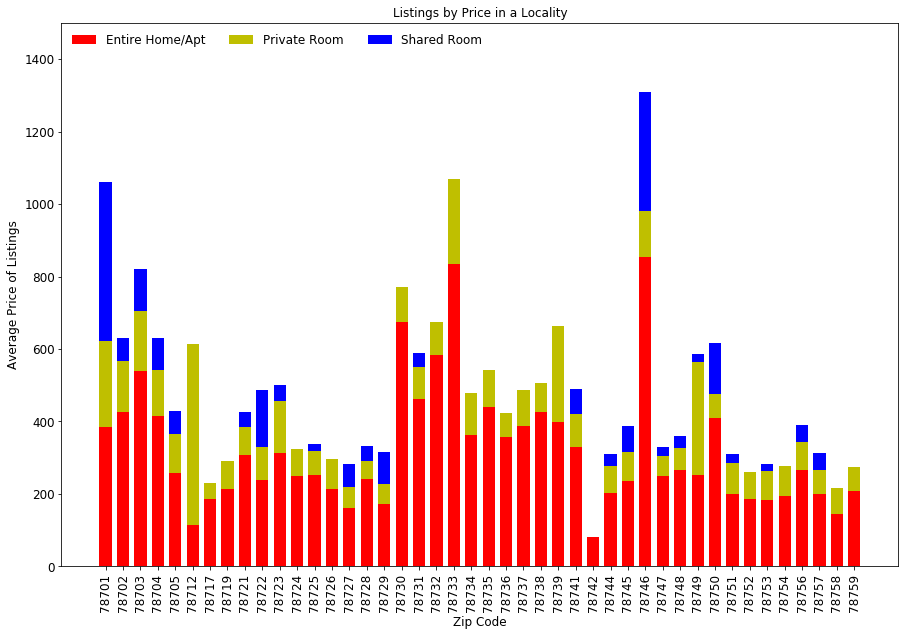

In [7]:
#Plot 2
u_agg_avg_df = u_zrt_avg_df[['neighbourhood', 'room_type', 'price']]
u_agg_avg_pivot_df = u_agg_avg_df.pivot(index='neighbourhood', columns='room_type', values='price')
value_avgrate_HA = u_agg_avg_pivot_df['Entire home/apt']
value_avgrate_PR = u_agg_avg_pivot_df['Private room']
value_avgrate_SR = u_agg_avg_pivot_df['Shared room']
data_avgrate_array = [value_avgrate_HA,value_avgrate_PR,value_avgrate_SR]
x_indexs = np.arange(len(zip_codes))
plt.figure(figsize=(15,10))
p1 = plt.bar(x_indexs, value_avgrate_HA, width=0.7, color='r')
p2 = plt.bar(x_indexs, value_avgrate_PR, width=0.7, bottom=value_avgrate_HA, color='y')
p3 = plt.bar(x_indexs, value_avgrate_SR, width=0.7, bottom=[sum(x) for x in zip(value_avgrate_HA,value_avgrate_PR)], color='b')
plt.ylim([0,1500])
plt.yticks(fontsize=12)
plt.ylabel("Average Price of Listings", fontsize=12)
plt.xticks(x_indexs, zip_codes, fontsize=12, rotation=90)
plt.xlabel('Zip Code', fontsize=12)
plt.title('Listings by Price in a Locality')
plt.legend((p1[0], p2[0], p3[0]), ("Entire Home/Apt", "Private Room", "Shared Room"), fontsize=12, ncol=4, framealpha=0, fancybox=True)
plt.savefig("images/Stacked_bar_Chart_02.png")
plt.show()

The most expensive zip code (78746) relates to the West Lake Hill area of Austin, TX

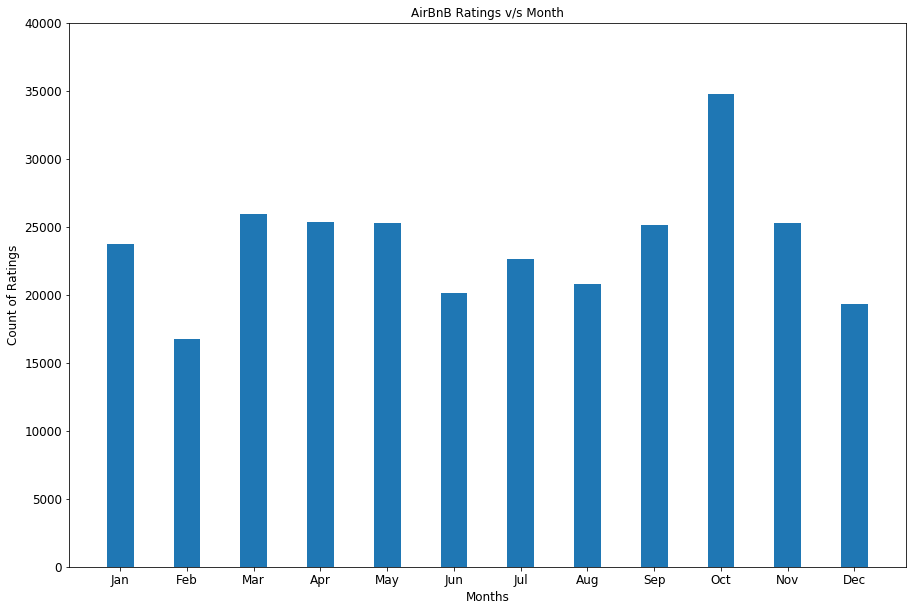

In [8]:
##6. Determine demand changes over the year ( what months have the most/least listings )
#u_listings_df
u_ratings_df = pd.read_csv("master_data/reviews.csv")
u_listings_subset_df = u_listings_df[['id', 'neighbourhood']]
u_ratings_subset_df = u_ratings_df[['listing_id', 'date']]
#Merge
u_merge_subset_df = pd.merge(u_ratings_subset_df, u_listings_subset_df, how='left', left_on='listing_id', right_on='id')
u_merge_subset_df['year'] = pd.DatetimeIndex(u_merge_subset_df['date']).year
u_merge_subset_df['month'] = pd.DatetimeIndex(u_merge_subset_df['date']).month
#Group the Month Data accross rating counts
u_merge_month_subset_df = u_merge_subset_df[['id', 'month']]
#mrc = monthly ratings count spanning accross all of the available data-set.
u_mrc_groupby_df = u_merge_month_subset_df.groupby('month')
u_mrc_count_df = u_mrc_groupby_df.count()
u_mrc_count_df = u_mrc_count_df.reset_index()
u_mrc_count_df['month'] = u_mrc_count_df['month'].apply(lambda x: calendar.month_abbr[x])
x_mrc_index_months = u_mrc_count_df['month']
y_mrc_data_counts = u_mrc_count_df['id']
x_indexs_mrc = np.arange(len(x_mrc_index_months))
plt.figure(figsize=(15,10))
p1 = plt.bar(x_indexs_mrc, y_mrc_data_counts, width=0.4)
plt.ylim([0,40000])
plt.yticks(fontsize=12)
plt.ylabel("Count of Ratings", fontsize=12)
plt.xticks(x_indexs_mrc, x_mrc_index_months, fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.title('AirBnB Ratings v/s Month')
plt.savefig("images/Bar_Chart_Ratings_in_month_03.png")
plt.show()

* The number of reviews in each month is pretty consistent across the board except for lower counts in February and higher counts in October.
* The F1 race typically takes place in October of each year so that is a potential explanation of the October increase.

In [9]:
#configure gmaps
gmaps.configure(api_key=gkey)
#import CSV
csvfile = os.path.join('master_data/listings.csv')
#build Dataframe
df = pd.read_csv(csvfile)
df.dropna()
df = df.drop(columns = ['name', 'host_name', 'neighbourhood_group', 'minimum_nights', 'last_review', 'calculated_host_listings_count'])

#store latitude, longitude and number of reviews
coords = df[["latitude", "longitude"]]
reviews = df['number_of_reviews']
#create gmaps figure weighted on number of reviews
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(coords, weights=reviews, max_intensity=30, point_radius=3.0)
fig.add_layer(heat_layer)
#import AirBNB GeoJSON layer
with open('master_data/neighbourhoods.geojson') as f:
    geometry = json.load(f)

#add layer to fig   
geojson_layer = gmaps.geojson_layer(geometry)
fig.add_layer(geojson_layer)
#show fig
fig

Figure(layout=FigureLayout(height='420px'))

Zipcode 78704 has the most listings and is the shaded area on the heat map

In [10]:
popular = df.mode()
pop_neighborhood = int(popular["neighbourhood"][0])
print(f'The most popular neighborhood is: {pop_neighborhood}')
#find feature number in the GeoJson layer of most popular zip code
zipcode_feature = []
for e in range(44):
    if geometry['features'][e]['properties']['neighbourhood'] == str(pop_neighborhood):
        zipcode_feature.append(geometry['features'][e])
        print(f'The feature number of the most popular zip code in the GeoJson layer is: {e}')
#Create new GeoJson file showing only the most popular zip code
geometry_updated = geometry.copy()
geometry_updated['features'] = zipcode_feature

#Display gmaps of most popular zip code
fig2 = gmaps.figure()
fig2.add_layer(heat_layer)
single_zip_layer = gmaps.geojson_layer(geometry_updated)
fig2.add_layer(single_zip_layer)
fig2

The most popular neighborhood is: 78704
The feature number of the most popular zip code in the GeoJson layer is: 29


Figure(layout=FigureLayout(height='420px'))

Heat Map of Zip Codes and Ratings

## Conclusion

* Through our combined analysis it was interesting to see that things you would assume about Austin Airbnb such as the downtown area having the most listings, prices being higher on the weekend, and the overall popularity of the service increasing were confirmed by the data available.

* Although (78746) the West Lake Hills area is the most expensive, it had a relatively low number of listings for the area. The number of reviews in each month could be used to estimate demand for rentals and be very beneficial in terms of maximizing the price you list your rental for in each month if you are on the renting side of the transaction.

* If you are visiting the Austin area, you may get a better deal for an extended weekend if you book Saturday – Monday rather than Thursday – Sunday.

* Some of the finding were inconclusive because of the bias of reviews did not contain factual data of statisfactory index in a specific neighborhood, but overall it seems to become more and more popular alternative to visit Austin.